# Scaling experiments

Here we try to plot figures of scaling curves for MTL models and STL models and their PUB results. It can reflect how models perform for temporal and spatial generalization when the number of trained basins increases.

When the number of basins is small, the choice of basins may be biased. So we randomly select basins from the whole dataset for many times and calculate the mean/median metrics as the final result.

We can see the difference between MTL and STL models.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

# Get the current directory of the notebook
notebook_dir = os.path.abspath("")
# Get the parent directory of the notebook directory
project_dir = os.path.dirname(notebook_dir)
# import the module using a relative path
sys.path.append(project_dir)
import definitions
from scripts.streamflow_utils import get_json_file
from hydromtl.models.trainer import stat_result
from hydromtl.utils import hydro_constant


Please Check your directory:
ROOT_DIR of the repo:  /mnt/sdc/owen/code/HydroMTL
DATA_SOURCE_DIR of the repo:  /mnt/data/owen411/data
RESULT_DIR of the repo:  /mnt/sdc/owen/code/HydroMTL/results


/mnt/data/owen411/program/miniconda3/envs/MTL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x_percents = [5, 10, 15, 20, 25, 50, 75, 95]


There are multiple sub-experiments in each x_percent setting. Read them all and calcuate the mean/median value of all sub-experiments as the final result.

First, get the list of all experiments.

In [3]:
mtl_scale_exps = [
    "expscalemtlpercent" + str(x_percents[i]).zfill(3) for i in range(len(x_percents))
]
# et_scale_exps = [
#     "expscalestletpercent" + str(x_percents[i]).zfill(3) for i in range(len(x_percents))
# ]
q_scale_exps = [
    "expscalestlqpercent" + str(x_percents[i]).zfill(3) for i in range(len(x_percents))
]

Then, for each experiment, get the list of all sub-experiments.

1. Temporal generalization sub-experiments:

In [4]:
all_mtl_scale_temporal_exps=[]
all_q_scale_temporal_exps=[]
for i in range(len(mtl_scale_exps)):
    x_percent = x_percents[i]
    if x_percent < 50:
        split_num = int(1 / (x_percent / 100))
    else:
        split_num = round(1 / (1 - x_percent / 100))
    mtl_scale_temporal_exps = [
        mtl_scale_exps[i] + str(j + 1).zfill(2) for j in range(split_num)
    ]
    q_scale_temporal_exps = [
        q_scale_exps[i] + str(j + 1).zfill(2) for j in range(split_num)
    ]
    all_mtl_scale_temporal_exps.append(mtl_scale_temporal_exps)
    all_q_scale_temporal_exps.append(q_scale_temporal_exps)

Function to read metric of each sub-experiment:

In [12]:
def read_metric_of_all_sub_exps(
    scale_exps,
    var_idx=0,
    metric="NSE",
    var_names=[
        hydro_constant.streamflow.name,
        hydro_constant.evapotranspiration.name,
    ],
    var_units=["ft3/s", "mm/day"],
):
    ind_all_lst = []
    for i in range(len(scale_exps)):
        # for each sub-experiment
        ind_lst = []
        for j in range(len(scale_exps[i])):
            cfg_dir = os.path.join(
                definitions.RESULT_DIR,
                "camels",
                scale_exps[i][j],
            )
            cfg_data = get_json_file(cfg_dir)
            inds_df_tmp, _, _ = stat_result(
                cfg_data["data_params"]["test_path"],
                cfg_data["evaluate_params"]["test_epoch"],
                fill_nan=cfg_data["evaluate_params"]["fill_nan"],
                return_value=True,
                var_unit=var_units,
                var_name=var_names,
            )
            ind_lst.append(inds_df_tmp[var_idx][metric].values)
        ind_all_lst.append(ind_lst)
    return ind_all_lst

Then, we can read results of all the sub-experiments

For streamflow of MTL exps:

In [6]:
mtlq_temporal_metric_lst = read_metric_of_all_sub_exps(all_mtl_scale_temporal_exps)


/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromt

KeyboardInterrupt: 

For streamflow of STL exps:

In [7]:
stlq_temporal_metric_lst = read_metric_of_all_sub_exps(all_q_scale_temporal_exps)

/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromtl/utils/hydro_stat.py:413: RuntimeWarning: divide by zero encountered in double_scalars
  PBiaslow[k] = np.sum(lowpred - lowtarget) / np.sum(lowtarget) * 100
/mnt/sdc/owen/code/HydroMTL/hydromt

KeyboardInterrupt: 

2. Spatial generalization sub-experiments:

In [8]:
all_mtl_scale_spatial_exps = []
all_q_scale_spatial_exps = []
for i in range(len(mtl_scale_exps)):
    x_percent = x_percents[i]
    if x_percent < 50:
        split_num = int(1 / (x_percent / 100))
    else:
        split_num = round(1 / (1 - x_percent / 100))
    mtl_scale_spatial_exps = [
        mtl_scale_exps[i] + str(j + 1).zfill(2) + "0" for j in range(split_num)
    ]
    q_scale_spatial_exps = [
        q_scale_exps[i] + str(j + 1).zfill(2) + "0" for j in range(split_num)
    ]
    all_mtl_scale_spatial_exps.append(mtl_scale_spatial_exps)
    all_q_scale_spatial_exps.append(q_scale_spatial_exps)


Read metrics:

In [11]:
mtlq_spatial_metric_lst = read_metric_of_all_sub_exps(all_mtl_scale_spatial_exps)

[['expscalemtlpercent005010',
  'expscalemtlpercent005020',
  'expscalemtlpercent005030',
  'expscalemtlpercent005040',
  'expscalemtlpercent005050',
  'expscalemtlpercent005060',
  'expscalemtlpercent005070',
  'expscalemtlpercent005080',
  'expscalemtlpercent005090',
  'expscalemtlpercent005100',
  'expscalemtlpercent005110',
  'expscalemtlpercent005120',
  'expscalemtlpercent005130',
  'expscalemtlpercent005140',
  'expscalemtlpercent005150',
  'expscalemtlpercent005160',
  'expscalemtlpercent005170',
  'expscalemtlpercent005180',
  'expscalemtlpercent005190',
  'expscalemtlpercent005200'],
 ['expscalemtlpercent010010',
  'expscalemtlpercent010020',
  'expscalemtlpercent010030',
  'expscalemtlpercent010040',
  'expscalemtlpercent010050',
  'expscalemtlpercent010060',
  'expscalemtlpercent010070',
  'expscalemtlpercent010080',
  'expscalemtlpercent010090',
  'expscalemtlpercent010100'],
 ['expscalemtlpercent015010',
  'expscalemtlpercent015020',
  'expscalemtlpercent015030',
  'expsc

In [ ]:
stlq_spatial_metric_lst = read_metric_of_all_sub_exps(all_q_scale_spatial_exps)

Next, we can plot the scaling curves.

Temporal exps are plotted in one figure and spatial exps are plotted in another figure.

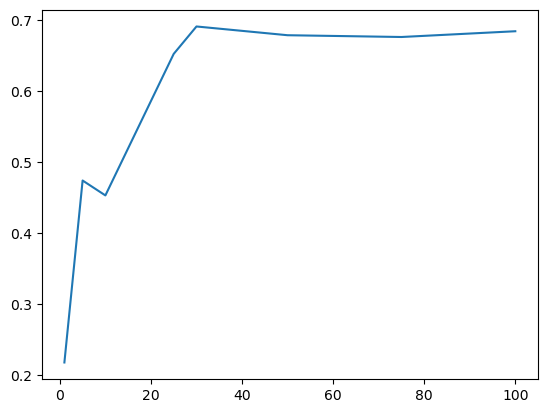

In [17]:
medians = [np.median(arr) for arr in inds_all_lst]

plt.plot(x_percents, medians)